In [1]:
# coding: utf-8
from __future__ import print_function
import sys
import pickle
import glob
import numpy as np
import os

from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table, Column
from astropy.table import Column, vstack
from astropy import table
from scipy import *
from scipy import optimize



In [2]:
def read_shotlist(fnshotlist):
    return Table(ascii.read(fnshotlist, format="fast_no_header"), names=["shots"])

In [12]:
COMMANDLINE = True

In [4]:
if COMMANDLINE:
    import argparse

    parser = argparse.ArgumentParser(description='Build a hetdex cube.')
    parser.add_argument('--dir_rebin', default="/scratch/04287/mxhf/rebin2")
    parser.add_argument('--shot', type=str, default="20180110v021",
                                help='Actual shots to use.')
    parser.add_argument('--usepca', action="store_false", default=True,
                                help='Do use PCA sky subtracted data (True).')
    args = parser.parse_args()

    dir_rebin = args.dir_rebin
    
    shot = args.shot
    
    usepca = args.usepca
else:
    
    dir_rebin = "/scratch/04287/mxhf/rebin2"
    shot = "20180110v021"
    usepca = True

In [8]:
# find all files for all shots
if usepca:
    prefix = "pca_"
else:
    prefix = ""


pattern = os.path.join(dir_rebin, shot, "exp0?", "{}multi_xxx_???_xxx_??_rebin.pickle".format(prefix))
print("Finding rebinned data for {}\n (searching for {})".format(shot, pattern))
shotfiles = glob.glob( pattern )
print("Found {} files.".format(len(shotfiles)))


Finding rebinned data for 20180110v021
 (searching for /scratch/04287/mxhf/rebin2/20180110v021/exp0?/pca_multi_xxx_???_xxx_??_rebin.pickle)
Found 231 files.


In [9]:
per_amp_sky_spectra = []

lw = None
N = len(shotfiles)
for i,shotfile in enumerate(shotfiles):
    if i % 10 == 0:
        print("Processing file number {} out of {}".format(i ,N))
    #print("Processing {}".format( shotfile )) 
    with open( shotfile , 'rb') as f:
        _lw, rebinned = pickle.load(f)
        # sanity check, make sure wlgrids are all the same
        if type(lw) == type(None):
            lw = _lw
        else:
            if not (lw == _lw).all():
                print("ERROR: Found Inconsistent wavelength grid in {}.".format(shotfile))
        per_amp_sky_spectra.append( np.nanmedian( rebinned['{}sky_spectrum'.format(prefix)]/rebinned['fiber_to_fiber'], axis=0 ) )


Processing file number 0 out of 231


/home1/04287/mxhf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home1/04287/mxhf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Processing file number 10 out of 231
Processing file number 20 out of 231


/home1/04287/mxhf/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Processing file number 30 out of 231
Processing file number 40 out of 231
Processing file number 50 out of 231
Processing file number 60 out of 231
Processing file number 70 out of 231
Processing file number 80 out of 231
Processing file number 90 out of 231
Processing file number 100 out of 231
Processing file number 110 out of 231
Processing file number 120 out of 231
Processing file number 130 out of 231
Processing file number 140 out of 231
Processing file number 150 out of 231
Processing file number 160 out of 231
Processing file number 170 out of 231
Processing file number 180 out of 231
Processing file number 190 out of 231
Processing file number 200 out of 231
Processing file number 210 out of 231
Processing file number 220 out of 231
Processing file number 230 out of 231


In [10]:
global_sky = np.nanmedian(per_amp_sky_spectra,axis=0)
sout = Table([lw, global_sky], names=['wavelength', 'counts'], dtype=[float,float])
sout.write("{}_sky.fits".format(shot), format="fits", overwrite=True)

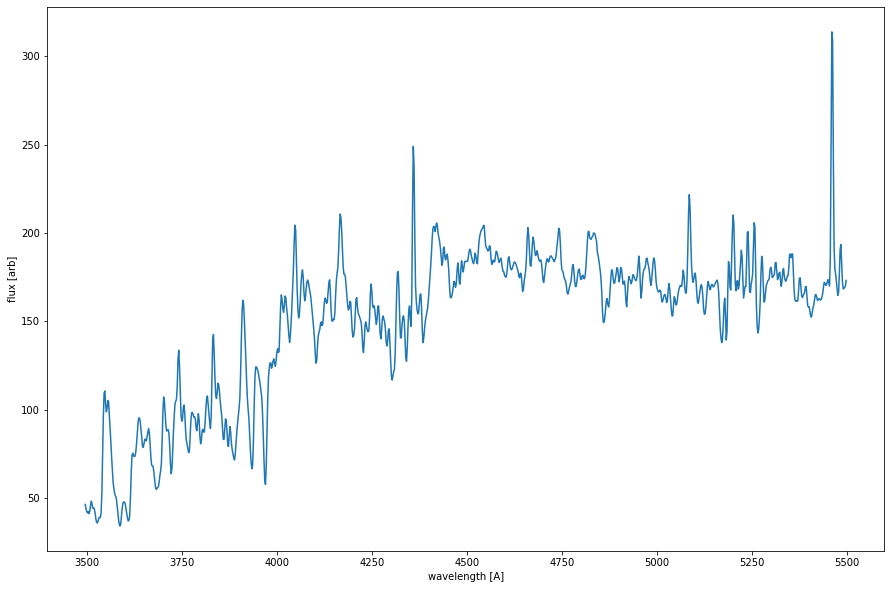

In [11]:
if not COMMANDLINE:
    from matplotlib import pyplot as plt
    %matplotlib inline

    f = plt.figure(figsize=[15,10])
    plt.plot(lw, global_sky)
    plt.xlabel("wavelength [A]")
    plt.ylabel("flux [arb]")